# **Classification Model** - **Employee Attrition**

## **Import Libraries**

In [417]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10, 6)
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier 
from sklearn.metrics import  mean_absolute_error, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
import joblib


## **Load and checking data**

In [419]:
df = pd.read_csv("Emp_attrition_csv.csv")
df.head(10)

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed
5,24368,38,Female,3,Technology,9977,Fair,High,Below Average,3,...,0,Mid,Medium,47.0,No,No,Yes,Fair,High,Left
6,64970,47,Male,23,Education,3681,Fair,High,High,1,...,3,Entry,Small,93.0,No,No,No,Good,Medium,Left
7,36999,48,Male,16,Finance,11223,Excellent,Very High,High,2,...,4,Entry,Medium,88.0,No,No,No,Excellent,Low,Stayed
8,32714,57,Male,44,Education,3773,Good,Medium,High,1,...,4,Entry,Medium,75.0,No,No,No,Fair,Medium,Stayed
9,15944,24,Female,1,Healthcare,7319,Poor,High,Average,1,...,4,Entry,Large,NaN,No,No,Yes,Good,Low,Left


In [420]:
#check the shape of the dataframe
df.shape

(74610, 24)

In [421]:
#checking the dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          72698 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital Status              746

## **Exploratory Data Analysis**

In [423]:
# checking unique values in columns, cardinality analysis
df.nunique()

Employee ID                   74498
Age                              42
Gender                            2
Years at Company                 51
Job Role                          5
Monthly Income                 9836
Work-Life Balance                 4
Job Satisfaction                  4
Performance Rating                4
Number of Promotions              5
Overtime                          2
Distance from Home               99
Education Level                   5
Marital Status                    3
Number of Dependents              9
Job Level                         3
Company Size                      3
Company Tenure (In Months)      127
Remote Work                       2
Leadership Opportunities          2
Innovation Opportunities          2
Company Reputation                4
Employee Recognition              4
Attrition                         2
dtype: int64

In [424]:
# data wrangling function
def wrangle(path):
    #read data
    df = pd.read_csv(path)
    # drop EmployeeID colum
    df.drop(columns = 'Employee ID', inplace = True)
    #remove outliers 
    low, high = df['Monthly Income'].quantile([0.00001, 0.9988])
    df = df[df['Monthly Income'].between(low, high)]
    #drop 'Marital Status' column
    df.drop(columns = 'Marital Status', inplace = True)
    #drop 'Company Tenure ' column
    df.drop(columns = 'Company Tenure (In Months)', inplace = True)
    #group Monthly Income to reduce cardinality
    labels = ['low', 'middle', 'high', 'highest']
    df['MonthlyIncome']= pd.qcut(df['Monthly Income'], 4, labels = labels)
    #drop the Monthly Income column
    df.drop(columns = 'Monthly Income', inplace = True)
    return df
    

In [425]:
# using wrangle to clean the data 
df = wrangle("Emp_attrition_csv.csv")

print(df.nunique())
print()
print(df.shape)
print()
df.head()


Age                         42
Gender                       2
Years at Company            51
Job Role                     5
Work-Life Balance            4
Job Satisfaction             4
Performance Rating           4
Number of Promotions         5
Overtime                     2
Distance from Home          99
Education Level              5
Number of Dependents         9
Job Level                    3
Company Size                 3
Remote Work                  2
Leadership Opportunities     2
Innovation Opportunities     2
Company Reputation           4
Employee Recognition         4
Attrition                    2
MonthlyIncome                4
dtype: int64

(74519, 21)



,Age,Gender,Years at Company,Job Role,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,...,Number of Dependents,Job Level,Company Size,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition,MonthlyIncome
0,31,Male,19,Education,Excellent,Medium,Average,2,No,22.0,...,0,Mid,Medium,No,No,No,Excellent,Medium,Stayed,low
1,59,Female,4,Media,Poor,High,Low,3,No,21.0,...,3,Mid,Medium,No,No,No,Fair,Low,Stayed,low
2,24,Female,10,Healthcare,Good,High,Low,0,No,11.0,...,3,Mid,Medium,No,No,No,Poor,Low,Stayed,high
3,36,Female,7,Education,Good,High,High,1,No,27.0,...,2,Mid,Small,Yes,No,No,Good,Medium,Stayed,low
4,56,Male,41,Education,Fair,Very High,Average,0,Yes,71.0,...,0,Senior,Medium,No,No,No,Fair,Medium,Stayed,low


Text(0.5, 1.0, 'Employee Attrition Count')

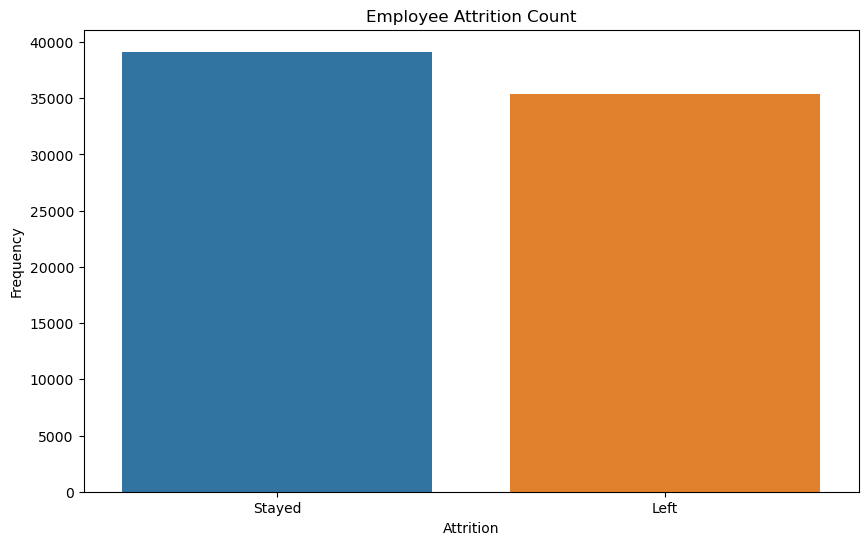

In [426]:
sns.countplot(df,
           x = 'Attrition')
plt.xlabel('Attrition')
plt.ylabel('Frequency')
plt.title('Employee Attrition Count')

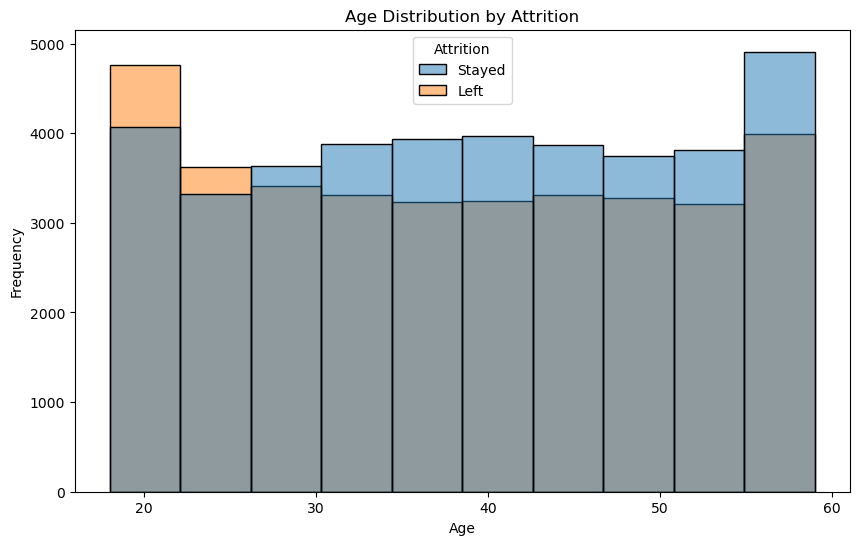

In [427]:
sns.histplot(df, x = 'Age', hue   = 'Attrition', bins = 10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Attrition')
plt.show();

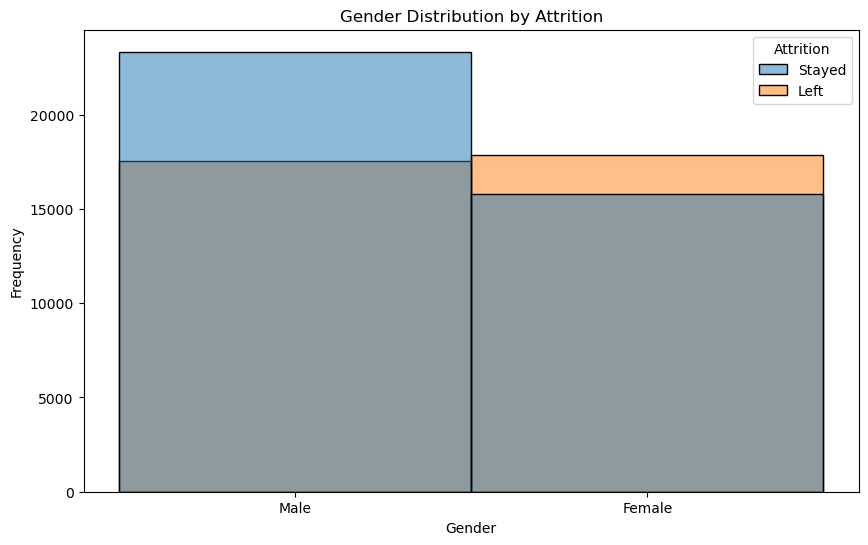

In [428]:
sns.histplot(df, x = 'Gender', hue = 'Attrition')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Gender Distribution by Attrition')
plt.show();

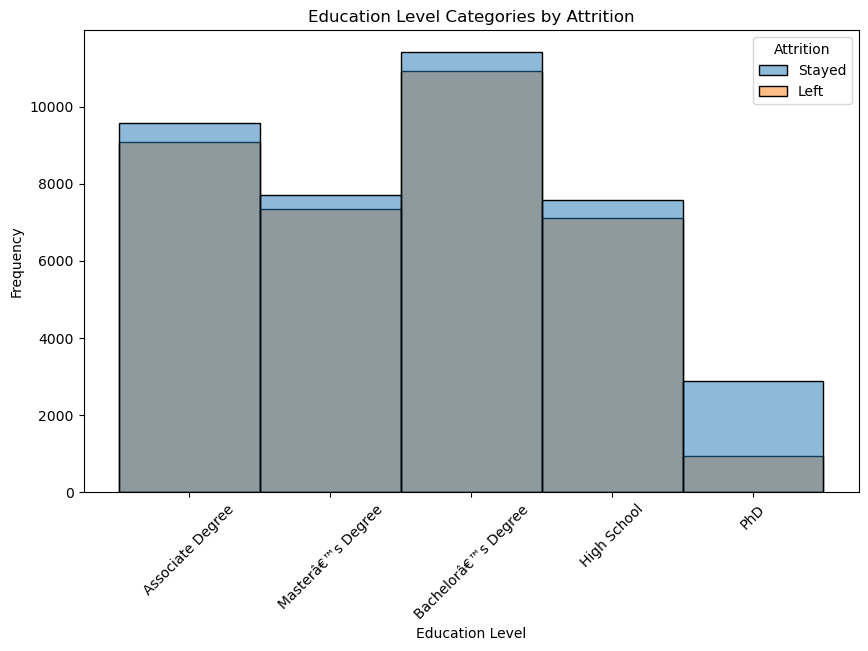

In [429]:
sns.histplot(df, x = 'Education Level', hue = 'Attrition')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.xticks(rotation = 45)
plt.title('Education Level Categories by Attrition')
plt.show();

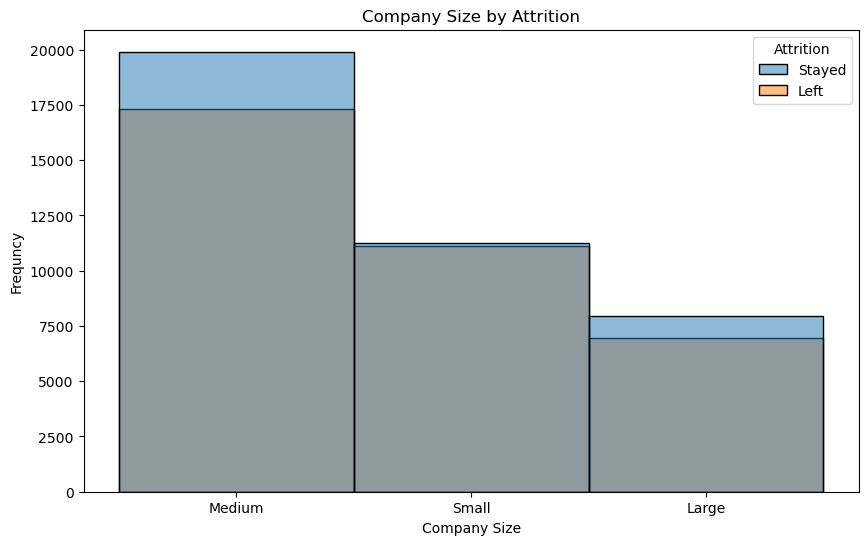

In [430]:
sns.histplot(df,  x = 'Company Size', hue = 'Attrition')
plt.xlabel('Company Size')
plt.ylabel('Frequncy')
plt.title('Company Size by Attrition')
plt.show();

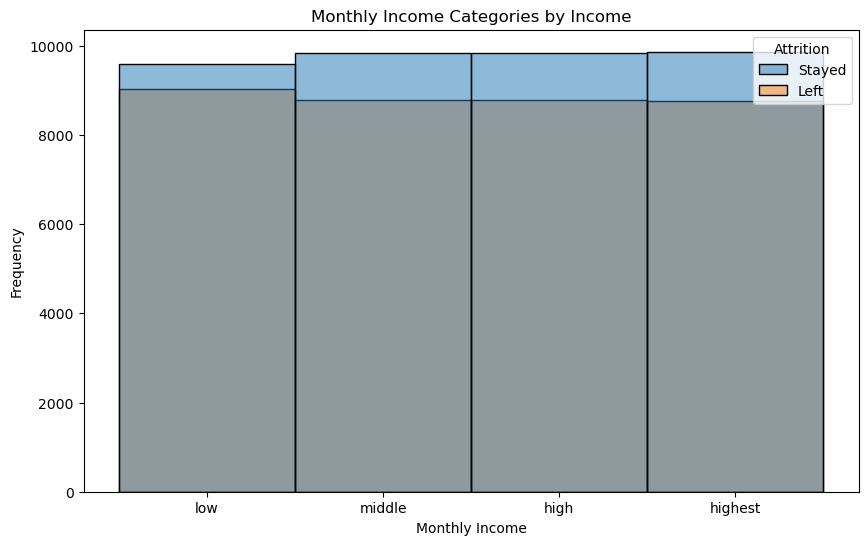

In [431]:
sns.histplot(df, x = 'MonthlyIncome', hue = 'Attrition')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.title('Monthly Income Categories by Income')
plt.show();

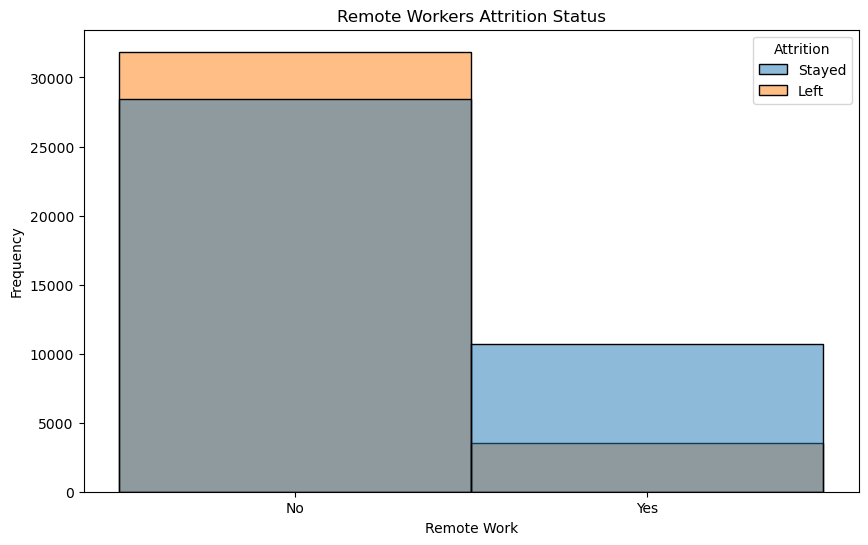

In [432]:
sns.histplot(df, x = 'Remote Work', hue = 'Attrition')
plt.xlabel('Remote Work')
plt.ylabel('Frequency')
plt.title('Remote Workers Attrition Status')
plt.show();

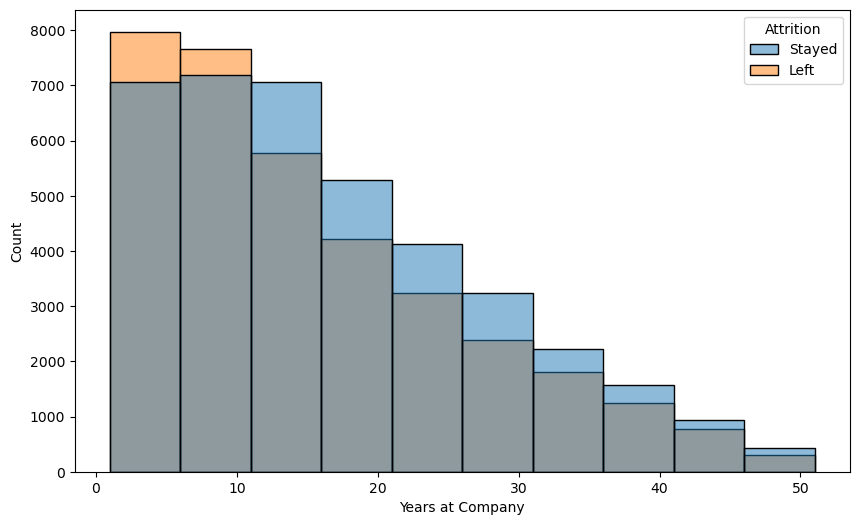

In [433]:
sns.histplot(df, x  = 'Years at Company', hue = 'Attrition', bins = 10);

## **Data Preprocessing**

In [435]:
# checking missing values
df.isna().sum()

Age                            0
Gender                         0
Years at Company               0
Job Role                       0
Work-Life Balance              0
Job Satisfaction               0
Performance Rating             0
Number of Promotions           0
Overtime                       0
Distance from Home          1910
Education Level                0
Number of Dependents           0
Job Level                      0
Company Size                   0
Remote Work                    0
Leadership Opportunities       0
Innovation Opportunities       0
Company Reputation             0
Employee Recognition           0
Attrition                      0
MonthlyIncome                  0
dtype: int64

 - **SimpleImputer**

In [437]:
#use simpleimputer to fill missing values with the mean on Distance from Home and Company Tenure
imputer = SimpleImputer()
#fit the imputer
df["Distance from Home"] = imputer.fit_transform(df["Distance from Home"].values.reshape(-1,1))
df["Distance from Home"].isna().sum()

0

In [438]:
print(df.nunique())

Age                          42
Gender                        2
Years at Company             51
Job Role                      5
Work-Life Balance             4
Job Satisfaction              4
Performance Rating            4
Number of Promotions          5
Overtime                      2
Distance from Home          100
Education Level               5
Number of Dependents          9
Job Level                     3
Company Size                  3
Remote Work                   2
Leadership Opportunities      2
Innovation Opportunities      2
Company Reputation            4
Employee Recognition          4
Attrition                     2
MonthlyIncome                 4
dtype: int64


- **Labelencorder**

In [440]:
# Encoding labels 
label_encoder = LabelEncoder() # for encoding target variable 'Attrition'
#fit the target variable
df['Attrition'] = label_encoder.fit_transform(df['Attrition'])
df['Attrition'].head()



0    1
1    1
2    1
3    1
4    1
Name: Attrition, dtype: int32

- **OrdinalEncoder**

In [442]:
# Encoding ordered values
ordinal_encoder = OrdinalEncoder()
#fit the encoder
(df[['Work-Life Balance',
'Job Satisfaction',
'Performance Rating',
'Education Level',
'Job Level',
'Company Size',
'Company Reputation',
'Employee Recognition',
'MonthlyIncome']]) = ordinal_encoder.fit_transform(df[['Work-Life Balance',
                                                        'Job Satisfaction',
                                                        'Performance Rating',
                                                        'Education Level',
                                                        'Job Level',
                                                        'Company Size',
                                                        'Company Reputation',
                                                        'Employee Recognition',
                                                        'MonthlyIncome']])

df.head()

,Age,Gender,Years at Company,Job Role,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,...,Number of Dependents,Job Level,Company Size,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition,MonthlyIncome
0,31,Male,19,Education,0.0,2.0,0.0,2,No,22.0,...,0,1.0,1.0,No,No,No,0.0,2.0,1,2.0
1,59,Female,4,Media,3.0,0.0,3.0,3,No,21.0,...,3,1.0,1.0,No,No,No,1.0,1.0,1,2.0
2,24,Female,10,Healthcare,2.0,0.0,3.0,0,No,11.0,...,3,1.0,1.0,No,No,No,3.0,1.0,1,0.0
3,36,Female,7,Education,2.0,0.0,2.0,1,No,27.0,...,2,1.0,2.0,Yes,No,No,2.0,2.0,1,2.0
4,56,Male,41,Education,1.0,3.0,0.0,0,Yes,71.0,...,0,2.0,1.0,No,No,No,1.0,2.0,1,2.0


- **OneHotEncoder**

In [444]:
# encoding binary categorical data
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse_output = False ).set_output(transform = 'pandas')
#fit the encoder

encoded = ohe.fit_transform(df[['Gender',
                                'Overtime',
                                'Remote Work',
                                'Leadership Opportunities',
                                'Innovation Opportunities',
                                'Job Role'
                                        ]])
encoded.head(2)

,Gender_Female,Gender_Male,Overtime_No,Overtime_Yes,Remote Work_No,Remote Work_Yes,Leadership Opportunities_No,Leadership Opportunities_Yes,Innovation Opportunities_No,Innovation Opportunities_Yes,Job Role_Education,Job Role_Finance,Job Role_Healthcare,Job Role_Media,Job Role_Technology
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [445]:
#concat the dataframes and drop original columns
df = pd.concat([df, encoded], axis = 1).drop(columns =['Gender',
                                                        'Overtime',
                                                        'Remote Work',
                                                        'Leadership Opportunities',
                                                        'Innovation Opportunities',
                                                        'Job Role'])
df.head()

,Age,Years at Company,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Distance from Home,Education Level,Number of Dependents,Job Level,...,Remote Work_Yes,Leadership Opportunities_No,Leadership Opportunities_Yes,Innovation Opportunities_No,Innovation Opportunities_Yes,Job Role_Education,Job Role_Finance,Job Role_Healthcare,Job Role_Media,Job Role_Technology
0,31,19,0.0,2.0,0.0,2,22.0,0.0,0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,59,4,3.0,0.0,3.0,3,21.0,3.0,3,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,24,10,2.0,0.0,3.0,0,11.0,1.0,3,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,36,7,2.0,0.0,2.0,1,27.0,2.0,2,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,56,41,1.0,3.0,0.0,0,71.0,2.0,0,2.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


## **Split Data**

In [447]:
#selecting target and feature
target = 'Attrition'
features = df.drop(columns = target)
X = features
y = df[target]

In [448]:
#split data using  train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print('X_train is', X_train.shape)
print('X_test is', X_test.shape)
print('y_train is', y_train.shape)
print('y_test is', y_test.shape)

X_train is (52163, 29)
X_test is (22356, 29)
y_train is (52163,)
y_test is (22356,)


## **Model Building and Training**

- **Logistic Regression**

In [451]:
#instantiate a logictic regression model
log_model = LogisticRegression(max_iter = 2000, random_state = 42, n_jobs = -1)
#fit the model
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=2000, n_jobs=-1, random_state=42)

In [452]:
#checking the score on training data
log_model.score(X_train, y_train)

0.68830397024711

In [453]:
#checking the score on test data
log_model.score(X_test, y_test)

0.6916264090177133

- **Random Forest Model**

In [455]:
#instantiate the Random Forest Classifier
random_forest_model = RandomForestClassifier(n_estimators = 100, max_depth = 5)
#fit the model
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [456]:
#checking the score on training data
random_forest_model.score(X_train, y_train)

0.6968157506278396

In [457]:
#checking the score on test data
random_forest_model.score(X_test, y_test)

0.6978887099660046

- **XGB Classifier**

In [459]:
#instantiate an xgbclassifier model
xgb_model = XGBClassifier()
#fit the model
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [460]:
#checking the score on training data
xgb_model.score(X_train, y_train)

0.7916530874374557

In [461]:
#checking the score on test data
xgb_model.score(X_test, y_test)

0.7188674181427804

### **Tuning Hyperparameters**

In [463]:
#Gridsearch on xgboost model
#define hyperparameter grid
param_grid = {'n_estimators' : [100, 200, 300, 400],
             'max_depth' : [None, 5, 10, 15]}

# instantiate Gridsearch to fine tune the models
grid_search = GridSearchCV( XGBClassifier(), param_grid, cv = 5, scoring = 'accuracy' )
#fit grid_search
grid_search.fit(X_train, y_train)

# best hyperparameters and best score
print("Best parameters", grid_search.best_params_)
print("Best scores", grid_search.best_score_)

Best parameters {'max_depth': 5, 'n_estimators': 100}
Best scores 0.714146016591996


In [464]:
#using best parameters
#instantiate an xgbclassifier model
xgb_model = XGBClassifier(n_estimators = 100, max_depth = 5)
#fit the model
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [465]:
# checking the score on training data
xgb_model.score(X_train, y_train)


0.7600406418342504

In [466]:
xgb_model.score(X_test, y_test)

0.7210592234746824

## **Predictions**

In [468]:
# predictions on train data using XGBClassifier
xgb_test_pred = xgb_model.predict(X_test)
xgb_test_pred[:10]

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

## **Model evaluation**

In [470]:
# accuracy score and classification_ report
accuracyscore = accuracy_score(xgb_test_pred, y_test)
class_report = classification_report(xgb_test_pred, y_test)

print("Accuracy score is", accuracyscore)
print()
print(class_report)

Accuracy score is 0.7210592234746824

              precision    recall  f1-score   support

           0       0.71      0.71      0.71     10648
           1       0.73      0.73      0.73     11708

    accuracy                           0.72     22356
   macro avg       0.72      0.72      0.72     22356
weighted avg       0.72      0.72      0.72     22356



In [471]:
# confusion_matrix
con_matrix = confusion_matrix(y_test, xgb_test_pred)

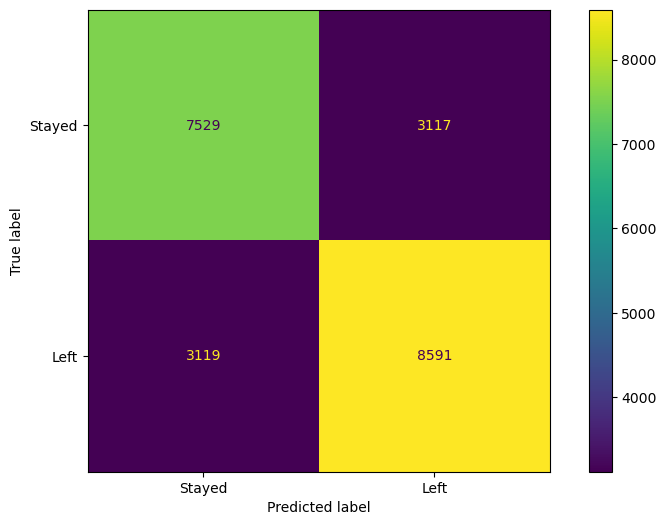

In [472]:
disp = ConfusionMatrixDisplay(confusion_matrix = con_matrix , display_labels = ['Stayed', 'Left'])
disp.plot()
plt.show()

## **Feature Importances**

In [474]:
#extract features 
feat_imp = xgb_model.feature_importances_
#make a features dataframe
feature_importances = pd.DataFrame({'features':X_train.columns, 'importances': feat_imp}).sort_values(by = 'importances', ascending = False)
feature_importances

,features,importances
9,Job Level,0.250633
18,Remote Work_No,0.227043
2,Work-Life Balance,0.078367
14,Gender_Female,0.062877
5,Number of Promotions,0.050691
7,Education Level,0.035941
11,Company Reputation,0.034709
8,Number of Dependents,0.031197
16,Overtime_No,0.029424
3,Job Satisfaction,0.024661


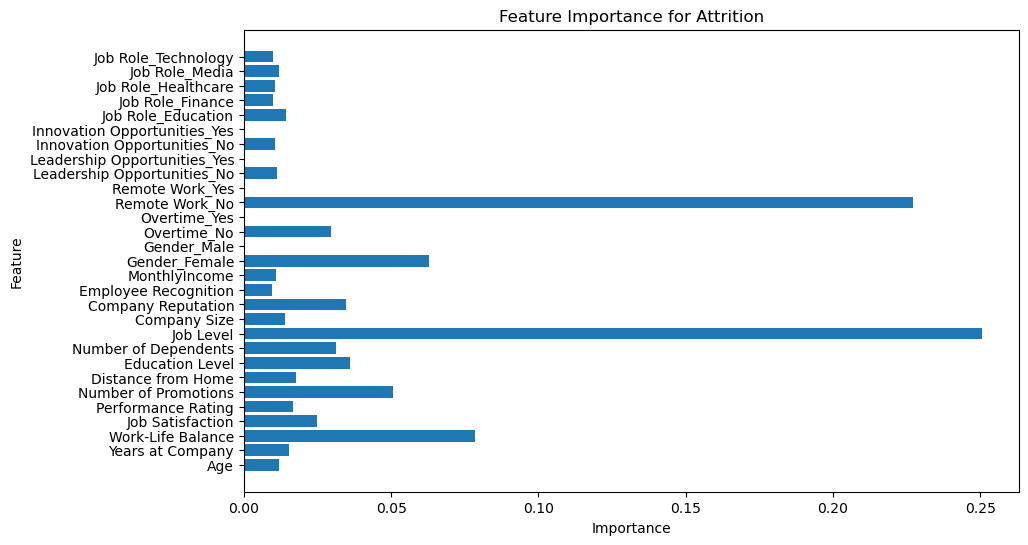

In [475]:
#plot feature importances
plt.barh(X_train.columns, feat_imp )
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Attrition')
plt.show();

In [477]:
joblib.dump(xgb_model, 'xgb_model.pkl')

['xgb_model.pkl']